In [16]:
import pandas as pd
import seaborn as sns
import numpy as np


# Read the data and Create a copy
LoanData = pd.read_csv("01Exercise1.csv")
LoanPrep = LoanData.copy()
LoanPrep.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [17]:
# Find out columns with missing values
LoanPrep.isnull().sum(axis=0)

gender     13
married     3
ch         50
income      0
loanamt    22
status      0
dtype: int64

In [18]:
# Replace Missing Values. Drop the rows.
LoanPrep = LoanPrep.dropna()

In [19]:
# Drop irrelevant columns based on business sense
LoanPrep = LoanPrep.drop(['gender'], axis=1)

In [20]:
# Create Dummy variables
LoanPrep.dtypes
LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

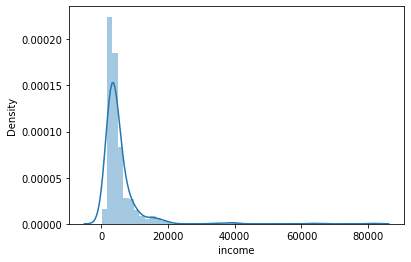

In [21]:
sns.distplot(LoanPrep['income'])

In [22]:
# Normalize the data (Income and Loan Amount) Using StandardScaler
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
scalar.fit(LoanPrep[['income']])
LoanPrep['sc_income'] = scalar.transform(LoanPrep[['income']])

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sc_income', ylabel='Density'>

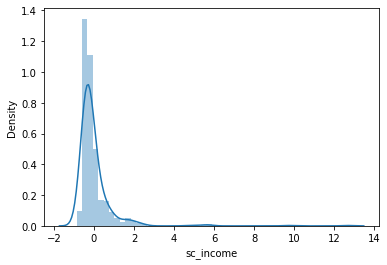

In [23]:
sns.distplot(LoanPrep['sc_income'])

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loanamt', ylabel='Density'>

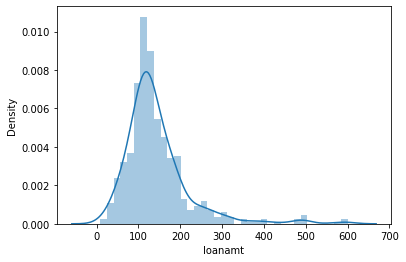

In [24]:
sns.distplot(LoanPrep['loanamt'])

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax_lnamount=MinMaxScaler()
minmax_lnamount.fit(np.array(LoanPrep['loanamt']).reshape(1, -1))
LoanPrep['minmax_loanamt']=minmax_lnamount.transform(LoanPrep['loanamt'])

ValueError: Expected 2D array, got 1D array instead:
array=[128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.  17.
 125.  76. 133. 115. 104. 315. 116. 191. 122. 110.  35. 120.  74. 106.
 114. 320. 100. 144. 184. 110.  80.  47. 134.  96.  88.  44. 144. 120.
 144. 100. 120. 112. 134. 286.  97.  96. 135. 180. 144. 120.  99. 165.
 116. 258. 126. 312. 125. 136. 172.  97.  81.  95. 187. 113. 176. 110.
 180. 111. 167.  50. 136. 104. 210. 175. 131. 188.  81. 122.  25. 137.
  50. 115. 131. 133. 151. 100. 225. 120. 216.  94. 136. 139. 152. 118.
 185. 154. 175. 259. 180.  44. 137.  81. 194. 160.  74.  70.  25. 102.
 290.  84.  88. 242. 129. 185. 168. 175. 122. 187. 100.  70.  30. 225.
 125. 118. 152. 244. 113.  50. 600. 187. 120. 255.  98. 275. 121. 158.
  75. 182. 112. 129.  63. 200.  95.  81. 187.  87. 116. 101. 495. 116.
 102. 180.  73. 260. 108. 120.  66. 188.  48. 164. 160.  76. 120. 170.
 187. 120.  83.  90. 166. 135. 124. 120.  80.  55.  59. 127. 214. 128.
 240. 130. 137. 100. 135. 131.  72.  60. 116. 144. 175. 128. 170. 138.
 210. 200. 104.  42. 120. 280. 140. 170. 112.  96. 120. 140. 155. 108.
 123. 120. 112. 137. 123.  90. 201. 138. 104. 279. 192. 255. 115.  94.
 304. 134. 155. 120. 128. 151. 150. 160. 135.  90.  30. 136. 126. 150.
  90. 115. 207.  80. 436. 158. 112.  78.  54.  89.  99. 120. 115. 187.
 139. 127. 134. 143. 172. 110. 200. 135. 151. 113.  93. 105. 132.  96.
 140. 135. 104. 480.  84. 111.  56. 111. 120. 155. 115. 124. 300. 376.
 130. 184. 110.  67. 117.  98.  71. 490.  70. 160. 176.  71. 173.  46.
 158.  74. 125. 160. 152. 126. 187. 228. 308.  95. 105. 130. 116. 165.
  67. 100. 200.  81. 236. 130. 141. 133.  96. 124. 175. 570.  55. 155.
 380. 111. 110. 120. 130.  71. 130. 128. 296. 156. 128. 100. 113. 132.
 136. 125. 185. 275. 113. 113.  71.  95. 109. 103.  45.  65. 103.  53.
 194. 115. 115.  66. 152. 360.  62. 218. 110. 178.  60. 160. 239. 112.
 138. 138.  80. 100. 110.  96. 121.  81. 133.  87.  60. 150. 105. 405.
 143. 100.  50. 187. 138. 187. 180. 148. 152. 130. 110.  55. 150. 125.
 149.  90.  84.  96. 118. 173. 136. 160. 128. 153. 132.  98. 140.  70.
  98. 110. 162. 113. 100. 162. 150. 230.  86. 154. 113. 128. 234. 246.
 131.  80. 500. 160.  75. 110. 225. 119. 105. 107.  95. 209. 113. 100.
 208. 124. 243. 188.  40. 100. 250. 148.  70. 311. 150. 113. 123. 185.
  95.  45.  55. 100. 480. 400. 110. 161.  94. 130. 100. 110. 125. 126.
 324. 107.  66. 157. 140.  99.  95. 128. 155.  80. 145. 103. 110. 158.
 181. 132.  26. 260. 162. 182. 108. 600. 211. 132. 258.  70. 123.   9.
 104. 186. 165. 275. 187. 150. 108. 110. 107. 161. 205.  90.  36. 146.
 172. 104.  70. 106.  56. 205. 142. 260. 110. 187.  88. 180. 192. 155.
 128. 172. 496. 173. 157. 108.  71.  40. 253. 187. 133.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
sns.distplot(LoanPrep['minmax_loanamt'])

In [26]:
#LoanPrep['income'] = scalar_.fit_transform(LoanPrep[['income']])
#LoanPrep['loanamt'] = scalar_.fit_transform(LoanPrep[['loanamt']])

In [27]:
# Create the X (Independent) and Y (Dependent) dataframes
# -------------------------------------------------------
Y = LoanPrep[['status_Y']]
X = LoanPrep.drop(['status_Y'], axis=1)

In [9]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

In [10]:
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
lr.fit(X_train, Y_train)

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [15]:
X_test.shape

(159, 4)

In [16]:
# Predict the outcome using Test data
Y_predict = lr.predict(X_test)
Y_predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1], dtype=uint8)

In [13]:
# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)

score = lr.score(X_test, Y_test)

In [27]:
score

0.8616352201257862